# *

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
pd.reset_option('display.max_rows')

In [17]:
pd.reset_option('display.max_columns')

# Imports and Dataset Loading

In [18]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc

import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from keras import layers



In [19]:
# load the dataset
insurance_data = pd.read_csv('insurance_claim_data.csv')

In [20]:
# Change the following columns to datetime objects
insurance_data['Accident Date'] = pd.to_datetime(insurance_data['Accident Date'])
insurance_data['Claim Date'] = pd.to_datetime(insurance_data['Claim Date'])

# Exploratory Data Analysis (EDA)

### Overall Dataset Understanding

In [21]:
# display the first 5 rows of the dataset
insurance_data.head()

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.0,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.0,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.0,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.0,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.0,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other


In [22]:
# check the dimension of the data
insurance_data.shape

(5000, 36)

In [23]:
# check all the data columns
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   SettlementValue             4894 non-null   float64       
 1   AccidentType                4878 non-null   object        
 2   Injury_Prognosis            4844 non-null   object        
 3   SpecialHealthExpenses       4870 non-null   float64       
 4   SpecialReduction            4879 non-null   float64       
 5   SpecialOverage              4883 non-null   float64       
 6   GeneralRest                 4872 non-null   float64       
 7   SpecialAdditionalInjury     4866 non-null   float64       
 8   SpecialEarningsLoss         4872 non-null   float64       
 9   SpecialUsageLoss            4870 non-null   float64       
 10  SpecialMedications          4870 non-null   float64       
 11  SpecialAssetDamage          4889 non-null   float64     

In [24]:
# compute the statistical summary of the insurance data
insurance_data.describe()

,SettlementValue,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,SpecialMedications,SpecialAssetDamage,...,GeneralUplift,SpecialLoanerVehicle,SpecialTripCosts,SpecialJourneyExpenses,SpecialTherapy,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers
count,4894.000000,4870.000000,4879.0,4883.000000,4872.000000,4866.000000,4872.000000,4870.000000,4870.000000,4889.000000,...,4863.000000,4861.000000,4885.000000,4853.000000,4868.000000,4862,4891,4874.000000,4871.000000,4878.000000
mean,1218.010685,3.611704,0.0,13.363580,463.305386,0.283580,52.191115,9.108830,0.109698,33.460761,...,10.407465,7.719720,1.959881,11.639120,183.600286,2021-12-24 21:20:25.092965376,2022-06-23 02:32:25.291450112,9.508617,48.789160,2.482370
min,240.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-01 00:00:00,2020-01-05 15:05:04.620924,0.000000,18.000000,1.000000
25%,669.140000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2020-12-27 06:37:48.453690112,2021-06-23 04:34:05.209040896,4.000000,33.000000,1.000000
50%,988.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,2021-12-15 08:59:49.197839104,2022-06-15 23:32:38.071613952,10.000000,49.000000,2.000000
75%,1510.000000,0.000000,0.0,0.000000,906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,350.000000,2022-12-18 22:51:43.820763904,2023-06-22 03:51:09.973994496,14.000000,64.000000,3.000000
max,7862.900000,3024.000000,0.0,1250.000000,3912.640000,889.000000,7735.580000,1050.000000,30.250000,6070.000000,...,1430.000000,4408.160000,254.200000,880.000000,1225.000000,2023-12-31 00:00:00,2024-12-08 06:47:01.524304,19.000000,79.000000,4.000000
std,858.866309,85.047845,0.0,84.223612,766.187669,12.988075,392.909130,65.505181,1.389916,282.692529,...,50.165743,141.155658,13.117419,49.086924,223.885780,NaN,NaN,5.727625,17.819725,1.109911


In [25]:
# check the unique values in the data
insurance_data.nunique()

SettlementValue               1022
AccidentType                    18
Injury_Prognosis                21
SpecialHealthExpenses            7
SpecialReduction                 1
SpecialOverage                  23
GeneralRest                    266
SpecialAdditionalInjury          5
SpecialEarningsLoss            108
SpecialUsageLoss                36
SpecialMedications              10
SpecialAssetDamage             156
SpecialRehabilitation            3
SpecialFixes                     5
GeneralFixed                    14
GeneralUplift                   19
SpecialLoanerVehicle            20
SpecialTripCosts                77
SpecialJourneyExpenses         269
SpecialTherapy                 300
Exceptional_Circumstances        2
Minor_Psychological_Injury       2
Dominant injury                  4
Whiplash                         2
Vehicle Type                     3
Weather Conditions               3
Accident Date                 3146
Claim Date                    4882
Vehicle Age         

In [26]:
# Machine learning models rely on variation in data to make predictions. 
# A feature that has only one unique value offers no distinguishing power between different samples
# The variable 'SpecialReduction'has a 0 value in mean, max, min, and standard deviation, it means all values in that column are the constant. 
# Constant features do not contribute to model learning because they provide no differentiation between sample
# Therefore, the column 'SpecialReduction' will be dropped

In [27]:
# check for missing values
insurance_data.isnull().sum()

SettlementValue               106
AccidentType                  122
Injury_Prognosis              156
SpecialHealthExpenses         130
SpecialReduction              121
SpecialOverage                117
GeneralRest                   128
SpecialAdditionalInjury       134
SpecialEarningsLoss           128
SpecialUsageLoss              130
SpecialMedications            130
SpecialAssetDamage            111
SpecialRehabilitation         116
SpecialFixes                  121
GeneralFixed                  121
GeneralUplift                 137
SpecialLoanerVehicle          139
SpecialTripCosts              115
SpecialJourneyExpenses        147
SpecialTherapy                132
Exceptional_Circumstances     109
Minor_Psychological_Injury    119
Dominant injury               110
Whiplash                      130
Vehicle Type                  126
Weather Conditions            114
Accident Date                 138
Claim Date                    109
Vehicle Age                   126
Driver Age    

### Variables Analysis

In [28]:
# create separate dataframes for variables based on different data types

numerical_data = insurance_data.select_dtypes(include=['float64'])
categorical_data = insurance_data.select_dtypes(include=['object'])
datetime_data = insurance_data.select_dtypes(include=['datetime', 'datetime64'])

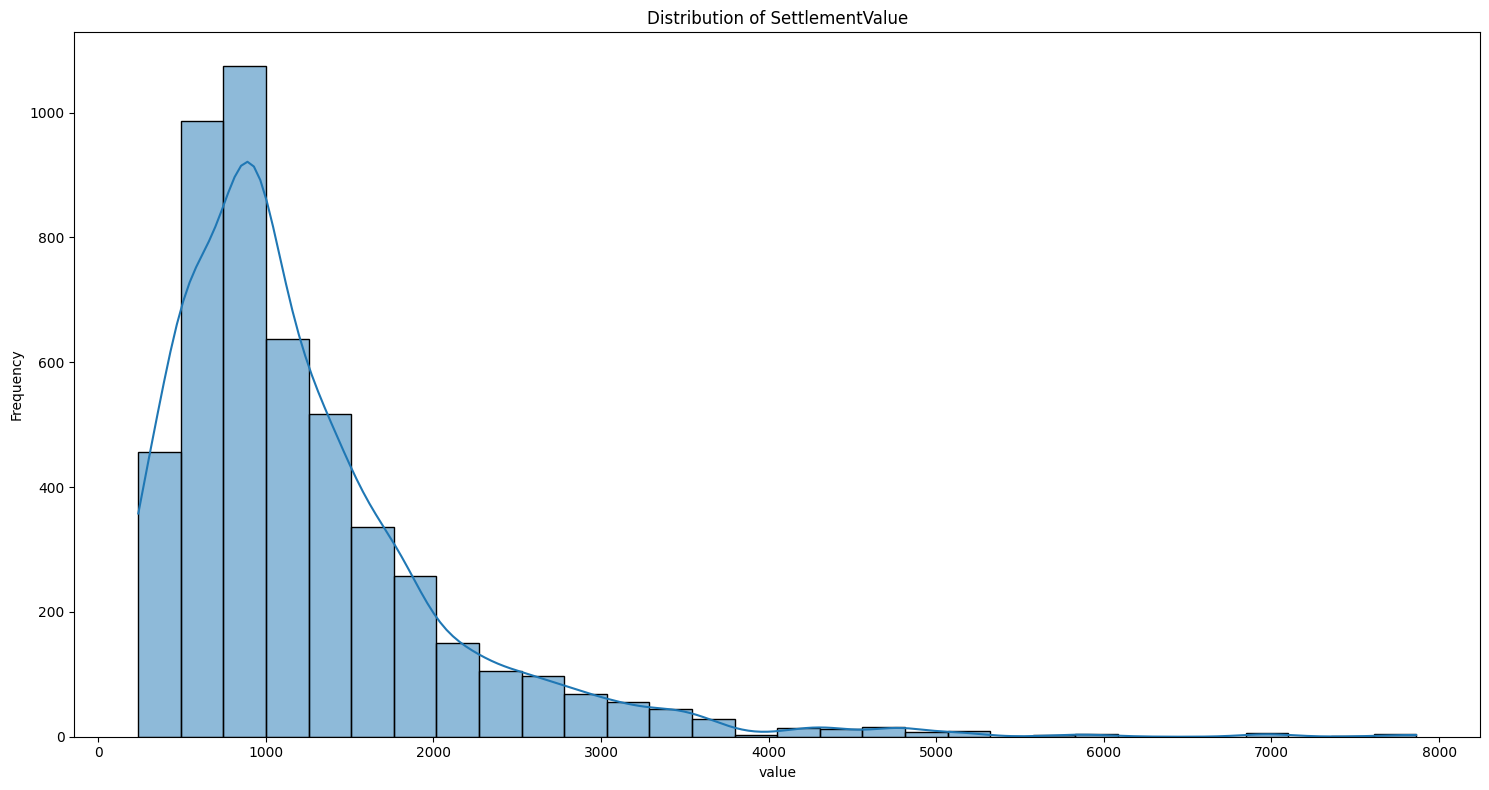

In [29]:
# visualize the distribution of target variable 'SettlementValue' using histogram
plt.figure(figsize=(15, 8))
sns.histplot(insurance_data['SettlementValue'], kde=True, bins=30) 
plt.title(f'Distribution of SettlementValue')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

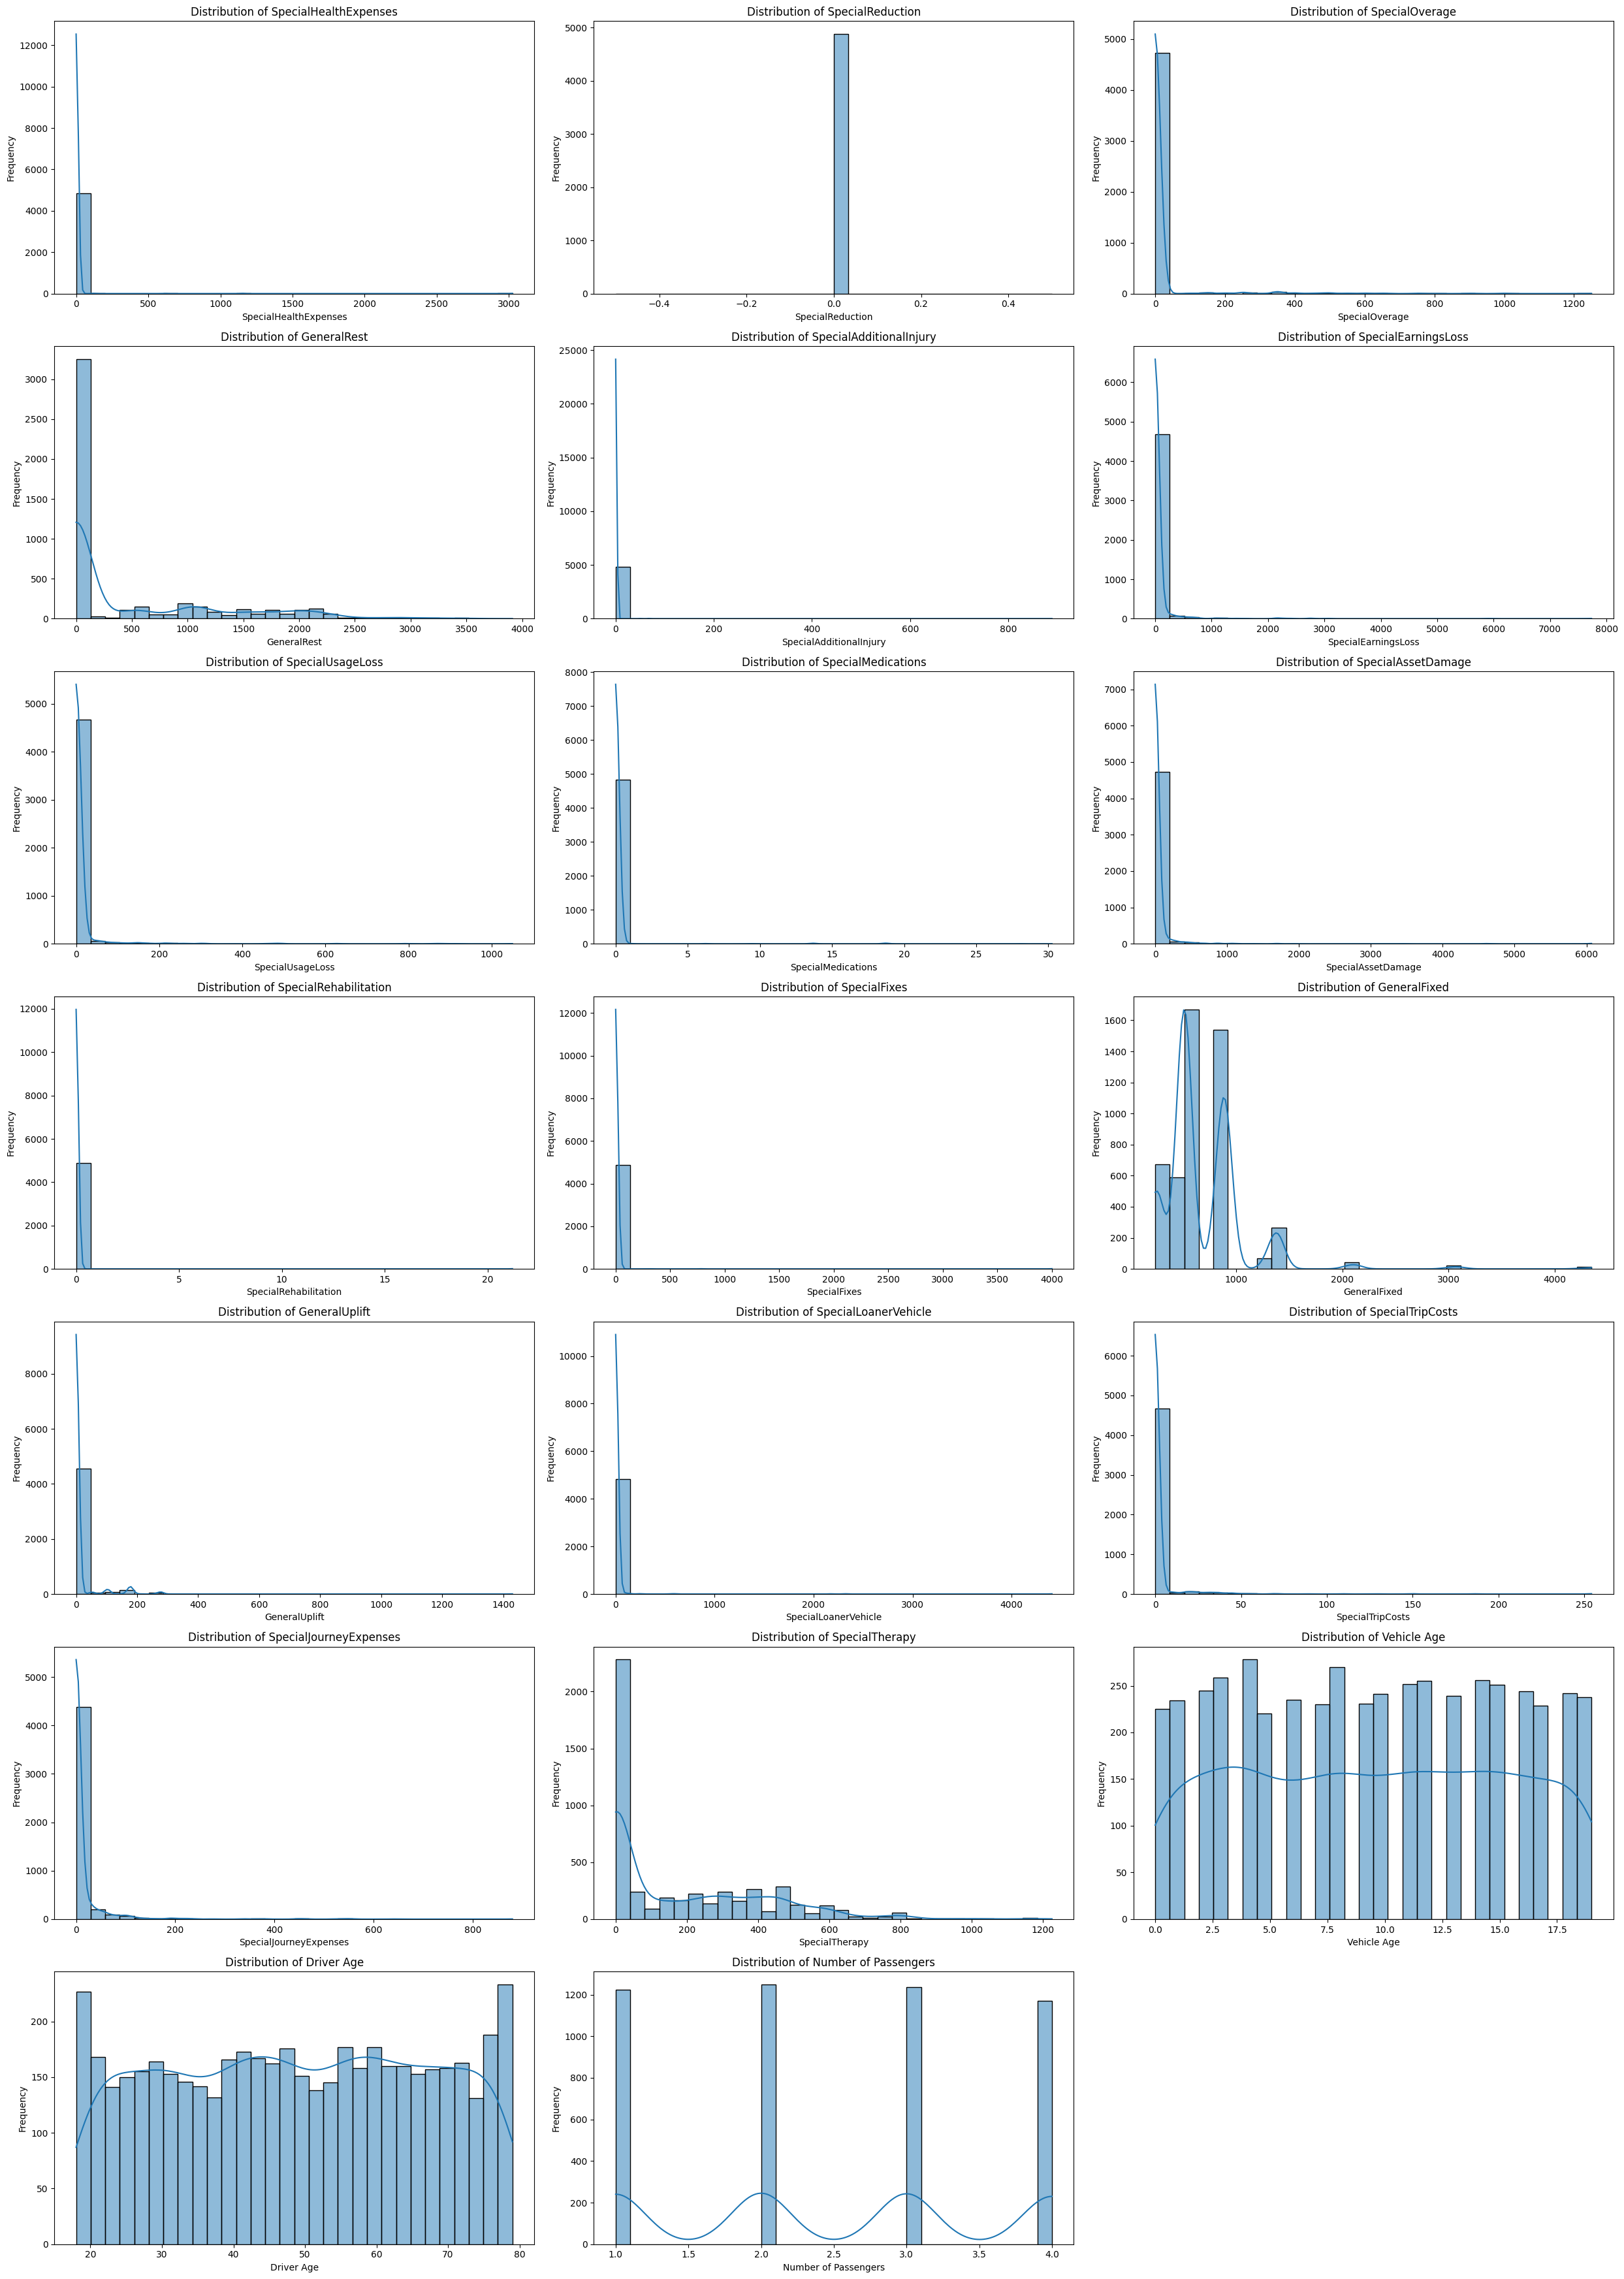

In [30]:
# visualize numerical input variables

numerical_data.drop('SettlementValue', axis=1, inplace=True) # drop the column of target variable

# Set up the figure and subplots
plt.figure(figsize=(25, 35))  # Adjust the figure size as needed
num_columns = len(numerical_data.columns)
rows = (num_columns // 3) + 1  # Adjust the number of rows based on the number of columns

# Loop through each numerical column and plot its distribution
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(rows, 3, i)  # Create a subplot for each column
    sns.histplot(numerical_data[column], kde=True, bins=30)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

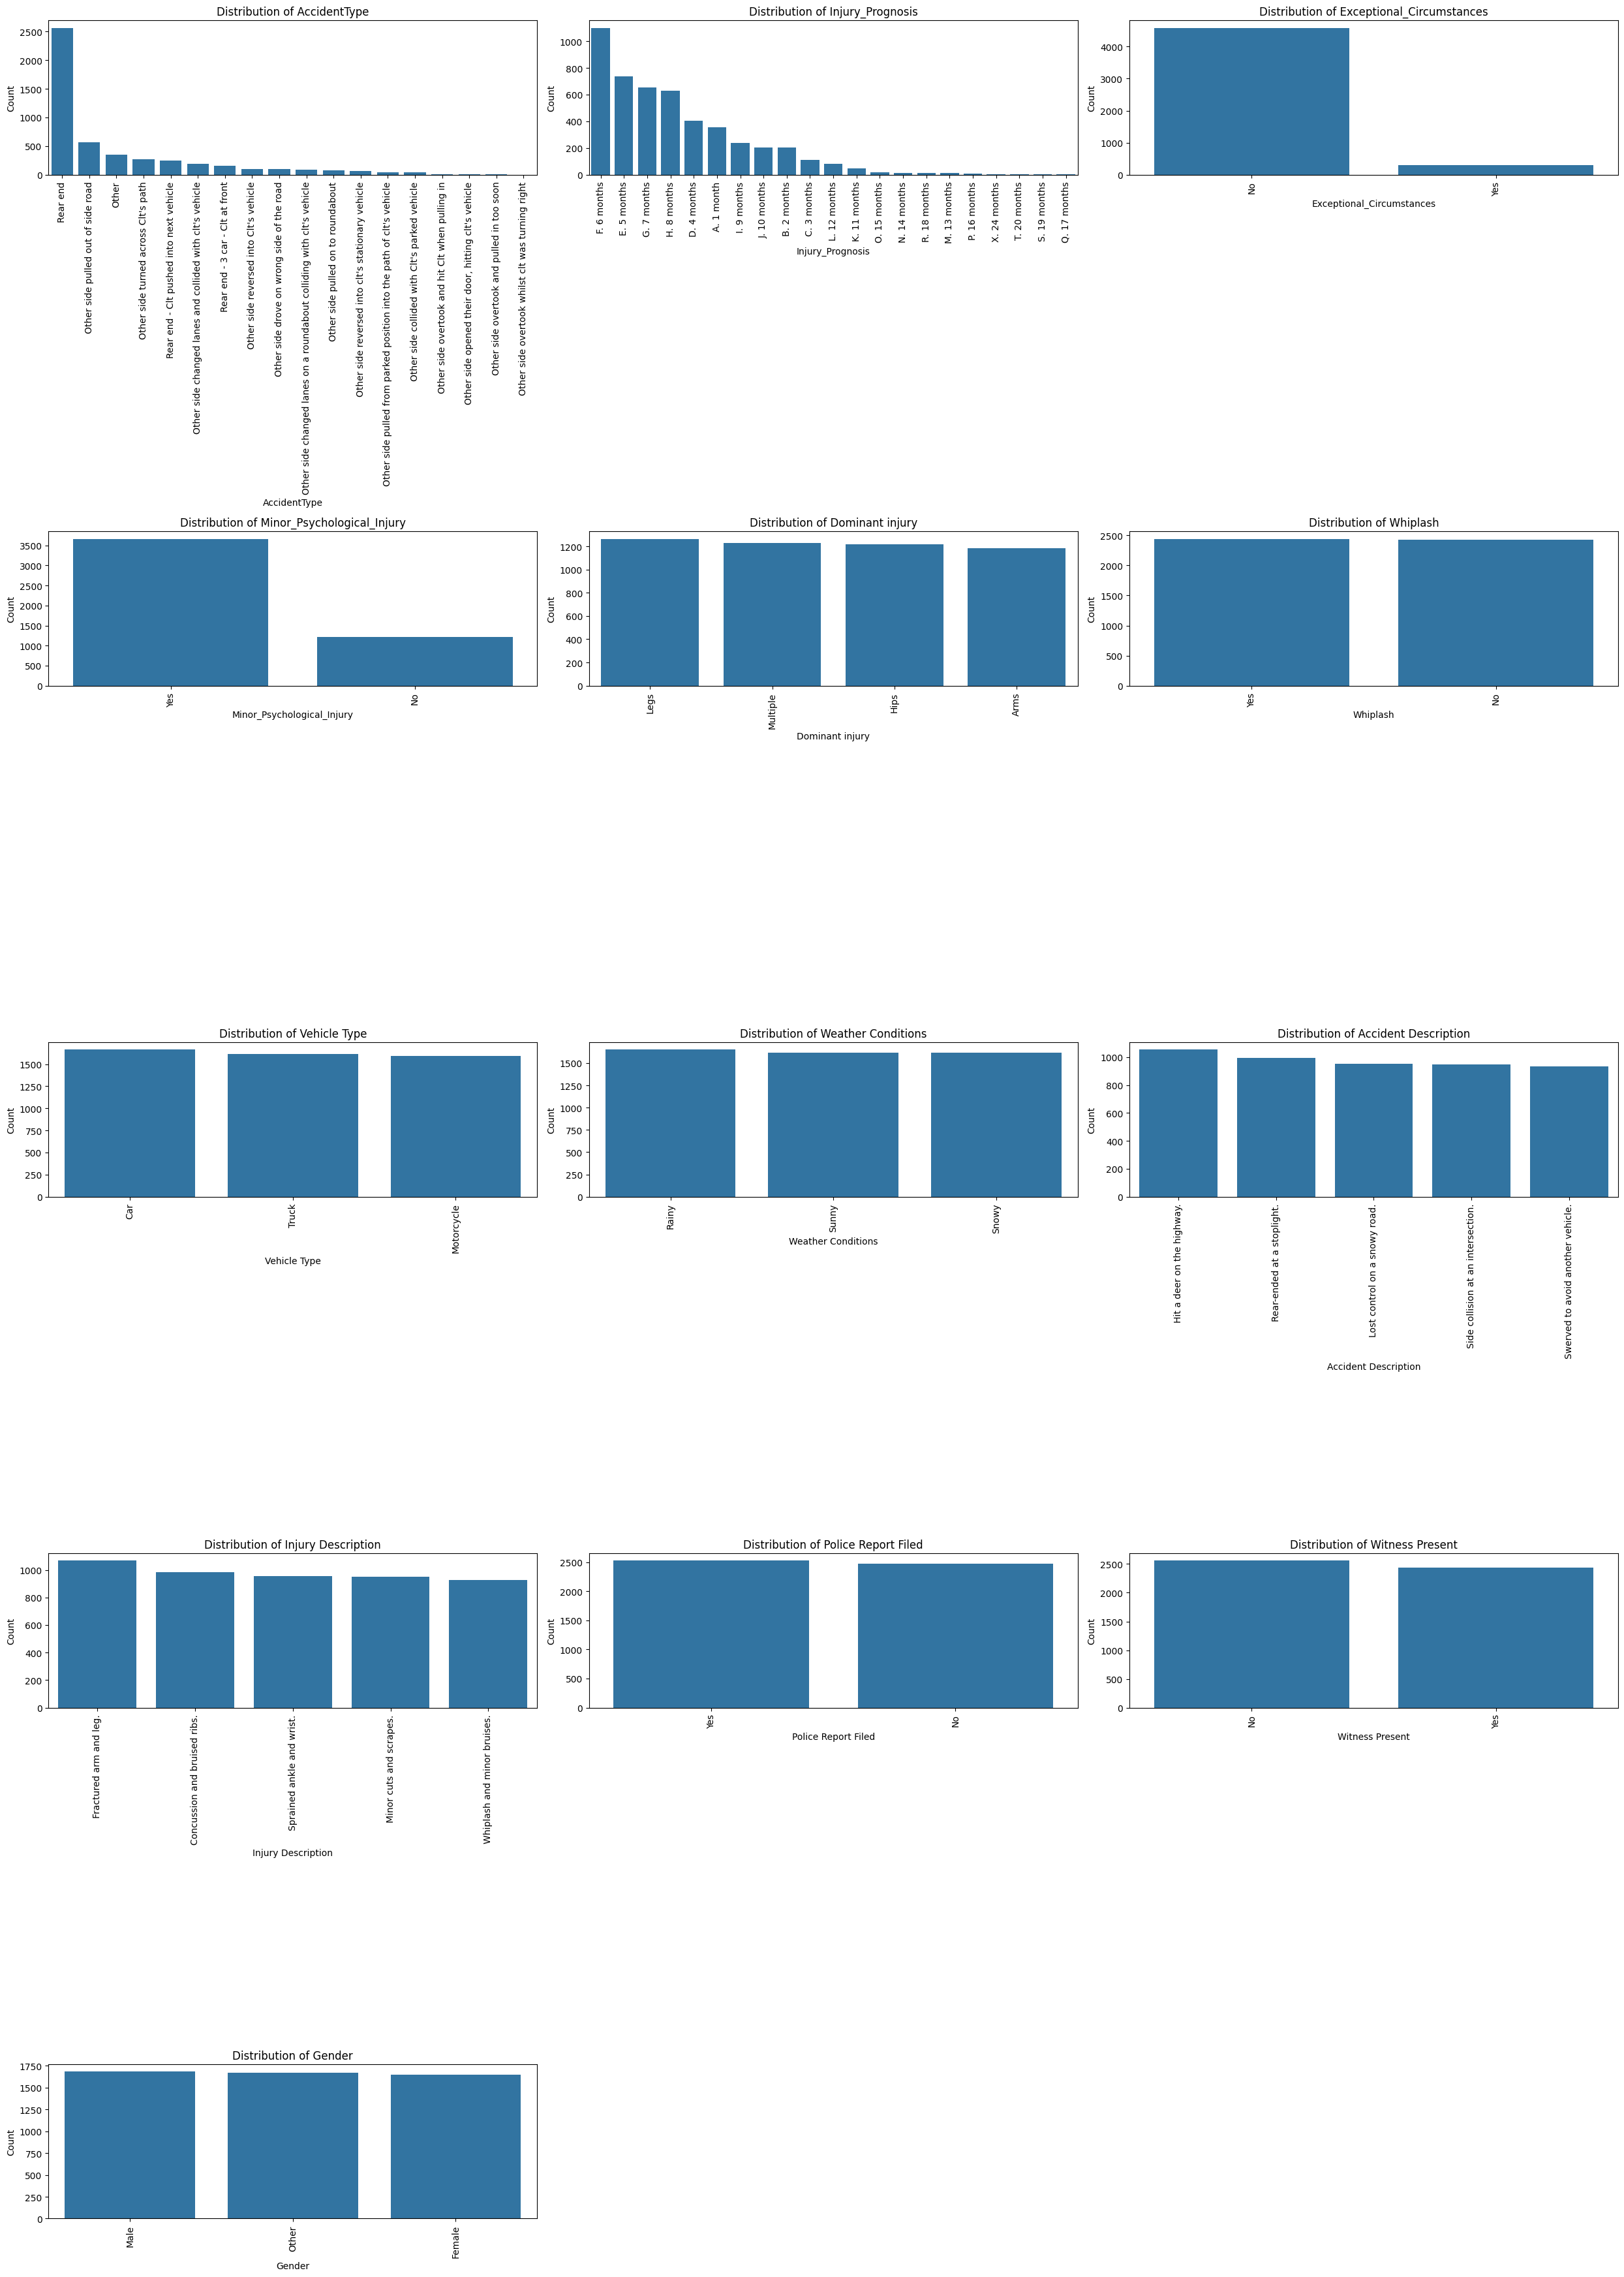

In [31]:
# visualize categorical input variables

plt.figure(figsize=(25, 35))  
num_columns = len(categorical_data.columns)
rows = (num_columns // 3) + 1  # Adjust the number of rows based on the number of columns

# Loop through each categorical column and plot its distribution
for i, column in enumerate(categorical_data.columns, 1):
    plt.subplot(rows, 3, i)  # Create a subplot for each column
    sns.countplot(x=categorical_data[column], order=categorical_data[column].value_counts().index)  # Plot bar plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

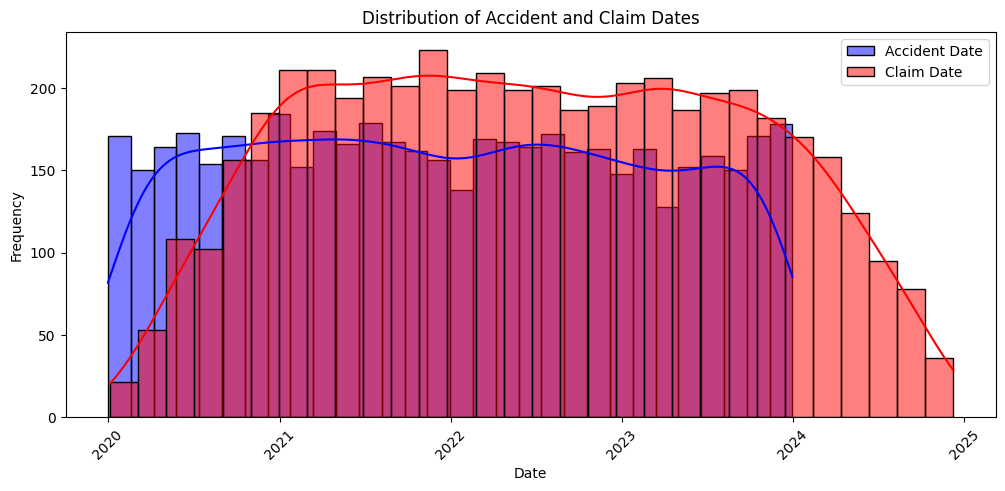

In [32]:
plt.figure(figsize=(12, 5))
sns.histplot(insurance_data["Accident Date"], bins=30, kde=True, color='blue', label="Accident Date")
sns.histplot(insurance_data["Claim Date"], bins=30, kde=True, color='red', label="Claim Date")

plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Distribution of Accident and Claim Dates")
plt.legend()
plt.xticks(rotation=45)
plt.show()


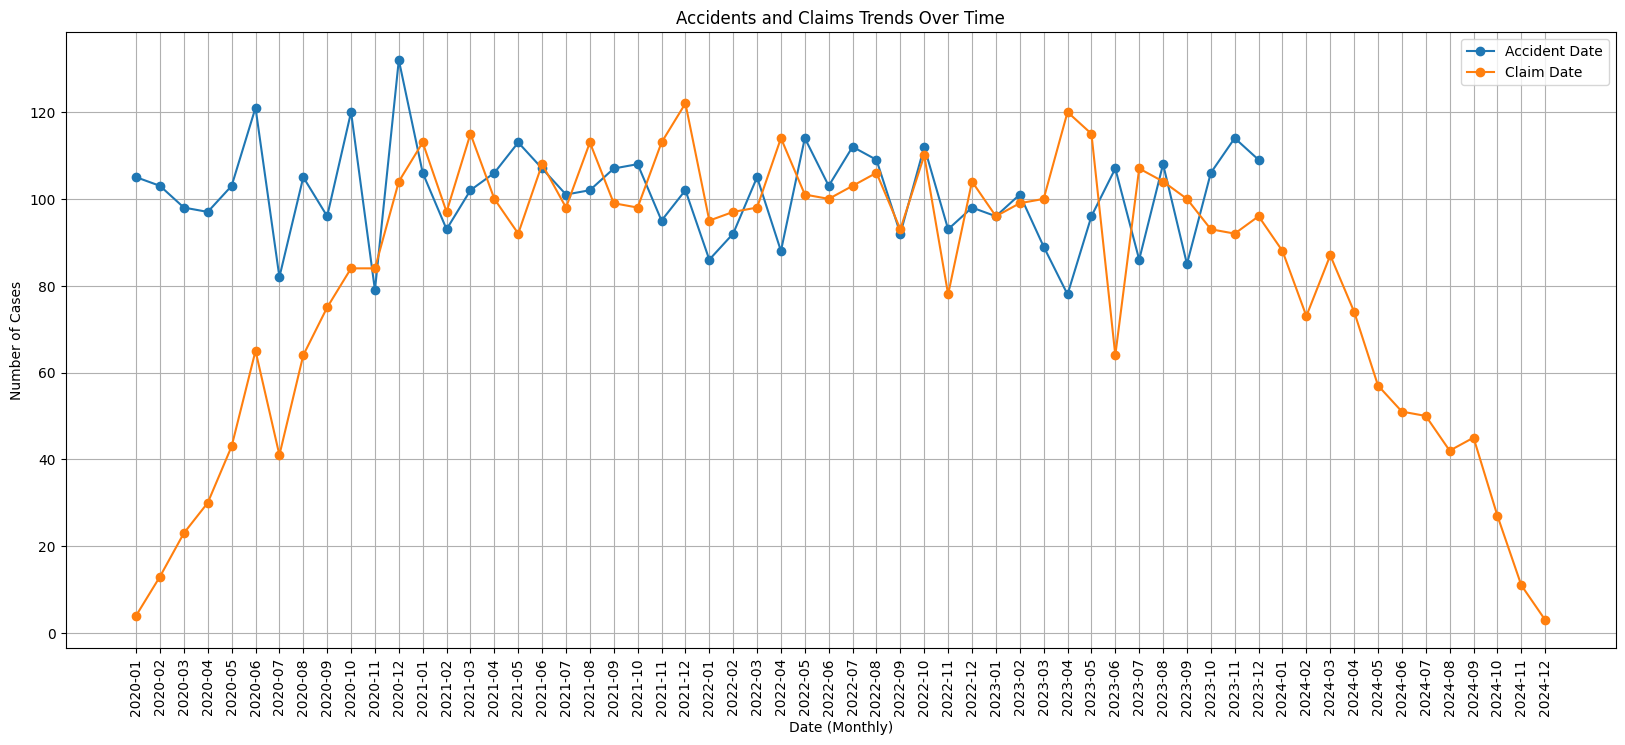

In [33]:
# visualization for date time data

# Count number of claims per month
accident = insurance_data.groupby(insurance_data["Accident Date"].dt.to_period("M")).size()
claim = insurance_data.groupby(insurance_data["Claim Date"].dt.to_period("M")).size()

# Plot
plt.figure(figsize=(20, 8))
plt.plot(accident.index.astype(str), accident, marker='o', label="Accident Date")
plt.plot(claim.index.astype(str), claim, marker='o', label="Claim Date")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Cases")
plt.title("Accidents and Claims Trends Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Outlier Analysis

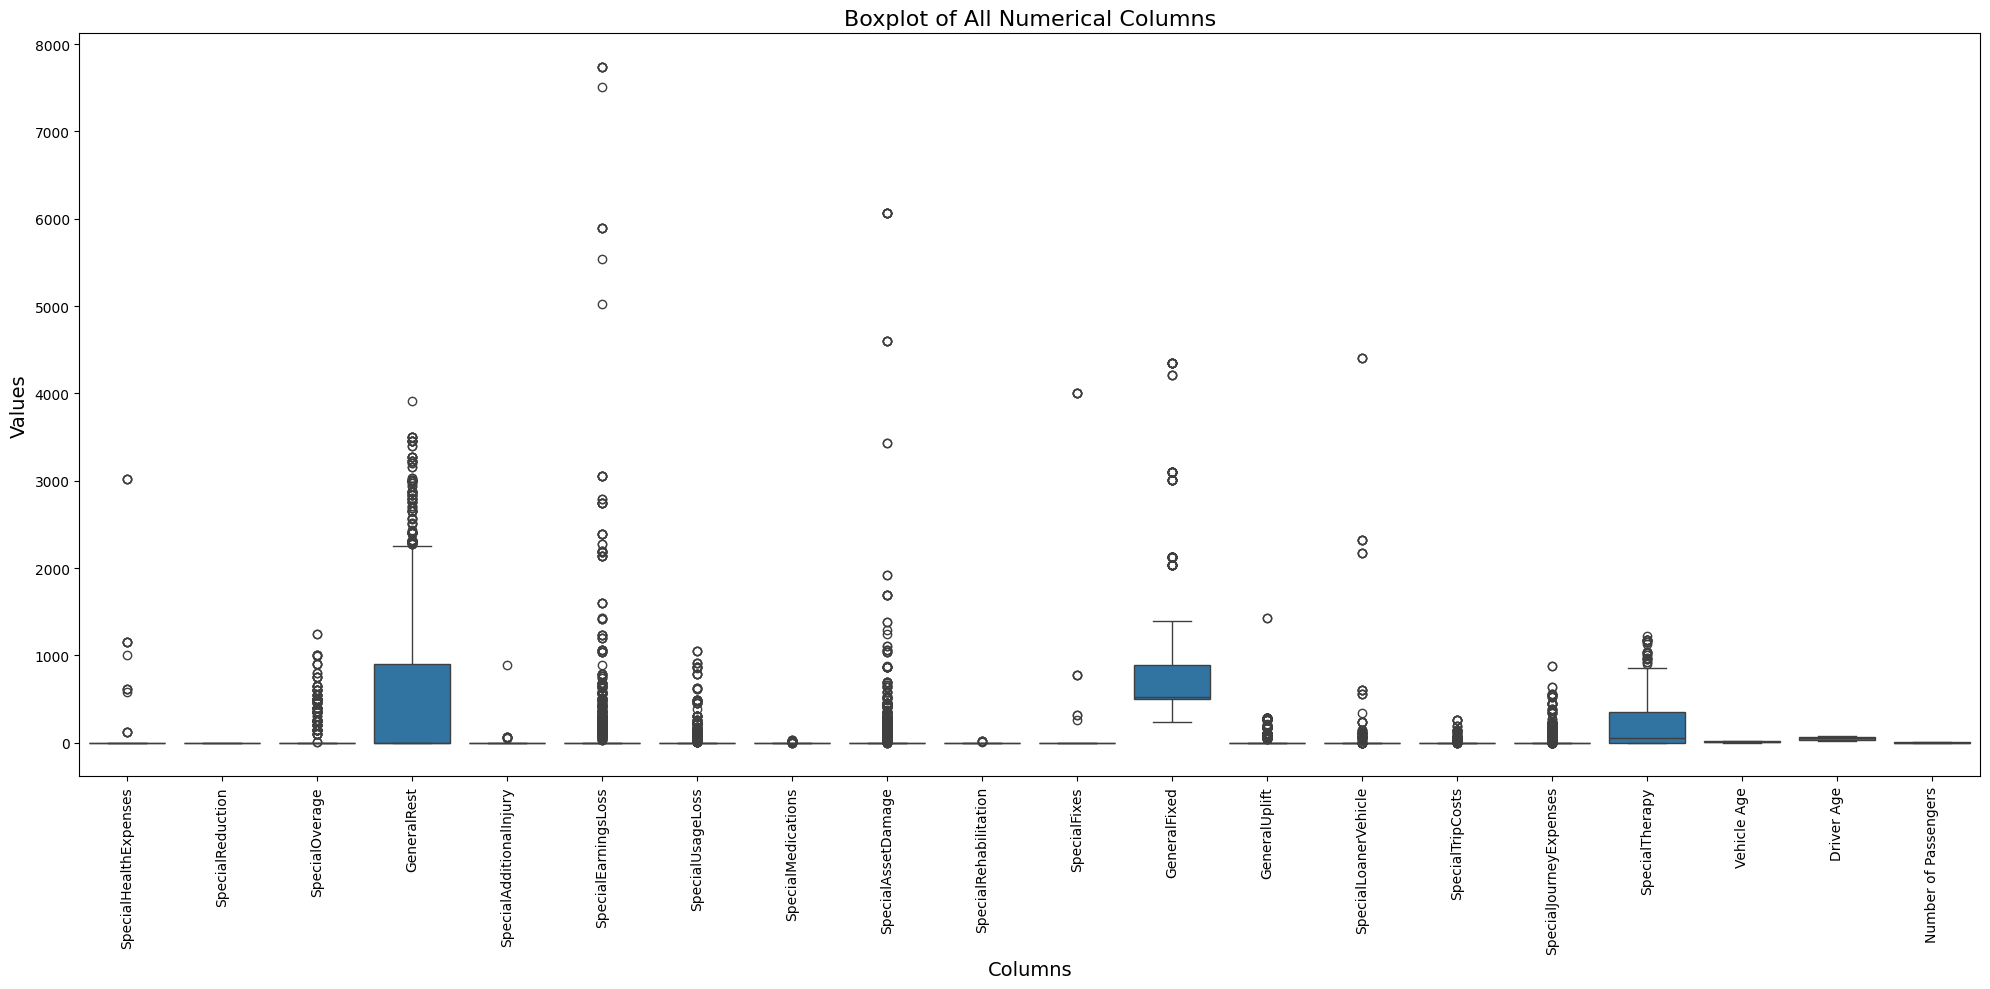

In [34]:
# visualize using boxplot

# Melt the DataFrame to long format for Seaborn
melted_data = numerical_data.melt(var_name='Columns', value_name='Values')

# Set up the figure
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability

# Create a boxplot for all numerical columns
sns.boxplot(x='Columns', y='Values', data=melted_data)
plt.title('Boxplot of All Numerical Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Main Findings of EDA 

__Overall__
+ Although .shape returns 5000 instances x 36 features, many of the features have missing values
+ The dataset presents large amounts of object type data requiring further preprocessing to be used in ML Workflows
+ From the numerical data breakdown there is a feature ***SpecialReduction*** which contains a Min and Max of 0 which provides no insights
+ From boxplots and .desribe we can see that there is large differences between the distribution of the data. For Example
    + There may be some features with 1Q,2Q,3Q is 0 but 4Q is a very large number
    + This indicates large +ve skewness
    + May have to perform some type of data transformation

__Target Variable__
+ The target has 106 instances with NaN which is an issue 
+ The histogram plot shows -ve skewness in the data with most of the data concentrated around 1000 and below
+ The min, max and median is also spread far apart indicating a need for transformation or normalization

__Features__
+ The features analyzed are of object nature
+ Most features are either Yes or No questions
    + May consider using LabelEncoder or OneHotEncoder to replace with numerical data
    + Features such as ***Gender***, ***ExceptionalCircumstances*** among others
+ The ***Injury_prognosis*** feature although being an object can be truncated to form a numerical value.
+ May consider feature engineering techniques to enhance the correlation between ***AccidentDate*** , ***ClaimDate*** with ***SettlementValue***
    + May 






# Data Preprocessing

### Drop constant columns

In [35]:
# Drop the constant column 'SpecialReduction' from the dataset
insurance_data.drop('SpecialReduction', axis=1, inplace=True)

### Feature Engineering on Accident and Claim Date

In [36]:
# convert datetime columns into numerical values that the model can process
insurance_data['Days_Between_Accident_And_Claim'] = (insurance_data['Claim Date'] - insurance_data['Accident Date']).dt.days

In [37]:
# drop the datetime columns
insurance_data.drop(['Accident Date', 'Claim Date'], axis=1, inplace=True)

In [38]:
# fill the missing values with the median imputation
#insurance_data['Days_Between_Accident_And_Claim'] = insurance_data['Days_Between_Accident_And_Claim'].fillna(
#    insurance_data['Days_Between_Accident_And_Claim'].median()
#)

### Handle Missing Values

In [39]:
# Deleting missing values in target variable is preferable because imputation will result in bias in the model 
# Supervised learning models (such as regression) require known target values for training

# delete the rows of target variable 'SettlementValue' with missing values and impute the missing values in the input variables 
insurance_data.dropna(subset=['SettlementValue'], inplace=True)

In [40]:
# Impute numerical columns with median
numerical_data = insurance_data.select_dtypes(include=['float64']).columns
insurance_data[numerical_data] = insurance_data[numerical_data].fillna(insurance_data[numerical_data].median())

# Impute categorical columns with mode
categorical_data = insurance_data.select_dtypes(include=['object']).columns
insurance_data[categorical_data] = insurance_data[categorical_data].fillna(insurance_data[categorical_data].mode().iloc[0])

# Impute datetime columns with median
#datetime_data = insurance_data.select_dtypes(include=['datetime', 'datetime64']).columns
#insurance_data[datetime_data] = insurance_data[datetime_data].fillna(insurance_data[datetime_data].median())

In [41]:
insurance_data.isnull().sum()

SettlementValue                    0
AccidentType                       0
Injury_Prognosis                   0
SpecialHealthExpenses              0
SpecialOverage                     0
GeneralRest                        0
SpecialAdditionalInjury            0
SpecialEarningsLoss                0
SpecialUsageLoss                   0
SpecialMedications                 0
SpecialAssetDamage                 0
SpecialRehabilitation              0
SpecialFixes                       0
GeneralFixed                       0
GeneralUplift                      0
SpecialLoanerVehicle               0
SpecialTripCosts                   0
SpecialJourneyExpenses             0
SpecialTherapy                     0
Exceptional_Circumstances          0
Minor_Psychological_Injury         0
Dominant injury                    0
Whiplash                           0
Vehicle Type                       0
Weather Conditions                 0
Vehicle Age                        0
Driver Age                         0
N

### Truncating the ***Injury_Prognosis*** feature

In [42]:
# The number of months is a numeric value but is embedded within a string
# The letters (A, B, C...) are arbitrary and do not represent an inherent order, they should be removed

In [43]:
# Truncate and extract the numbers from Injury_Prognosis to form a float instead of object
insurance_data["Injury_Prognosis"] = insurance_data["Injury_Prognosis"].str.extract("(\d+)").astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HRISHI\AppData\Local\Temp\ipykernel_10632\3991573653.py:2: SyntaxWarning: invalid escape sequence '\d'
  insurance_data["Injury_Prognosis"] = insurance_data["Injury_Prognosis"].str.extract("(\d+)").astype(float)


### Feature Encoding

In [44]:
# label encoding 

label_encoding_cols = ['Exceptional_Circumstances', 'Minor_Psychological_Injury', 'Whiplash', 'Police Report Filed', 'Witness Present']

label_encoder = LabelEncoder()

for col in label_encoding_cols:
    insurance_data[col] = label_encoder.fit_transform(insurance_data[col])

In [45]:
# one hot encoding

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoding_cols = ['Gender', 'Vehicle Type', 'Weather Conditions', 'Dominant injury']

# Fit and transform the selected columns
encoded_array = onehot_encoder.fit_transform(insurance_data[onehot_encoding_cols])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(onehot_encoding_cols))

# Drop the original columns and concatenate with the encoded DataFrame
insurance_data = pd.concat([insurance_data.drop(columns=onehot_encoding_cols), encoded_df], axis=1)


In [46]:
# target encoding
# Features described above have too many categories and using LabelEncoder or OneHotEncoder would introduce bias and OneHotEncoder would increase dimensionality

target_encoding_cols = ['AccidentType', 'Accident Description', 'Injury Description']
target_column = 'SettlementValue'  # The target column for encoding

for col in target_encoding_cols:
    # Calculate the mean of the target variable for each category
    target_means = insurance_data.groupby(col)[target_column].mean()
    # Map the target means to the original column
    insurance_data[col] = insurance_data[col].map(target_means)

insurance_data.dropna(inplace=True)

"""
## Performing TargetEncoding 
target_encode_cols = ["Injury Description", "AccidentType", "Accident Description"]

# Apply target encoding
for col in target_encode_cols:
    insurance_data[col] = insurance_data.groupby(col)["SettlementValue"].transform("mean").round(2)
"""


'\n## Performing TargetEncoding \ntarget_encode_cols = ["Injury Description", "AccidentType", "Accident Description"]\n\n# Apply target encoding\nfor col in target_encode_cols:\n    insurance_data[col] = insurance_data.groupby(col)["SettlementValue"].transform("mean").round(2)\n'

In [47]:
insurance_data.isnull().sum()

SettlementValue                    0
AccidentType                       0
Injury_Prognosis                   0
SpecialHealthExpenses              0
SpecialOverage                     0
GeneralRest                        0
SpecialAdditionalInjury            0
SpecialEarningsLoss                0
SpecialUsageLoss                   0
SpecialMedications                 0
SpecialAssetDamage                 0
SpecialRehabilitation              0
SpecialFixes                       0
GeneralFixed                       0
GeneralUplift                      0
SpecialLoanerVehicle               0
SpecialTripCosts                   0
SpecialJourneyExpenses             0
SpecialTherapy                     0
Exceptional_Circumstances          0
Minor_Psychological_Injury         0
Whiplash                           0
Vehicle Age                        0
Driver Age                         0
Number of Passengers               0
Accident Description               0
Injury Description                 0
P

# Feature Importance Analysis

### Correlation Analysis

<Axes: >

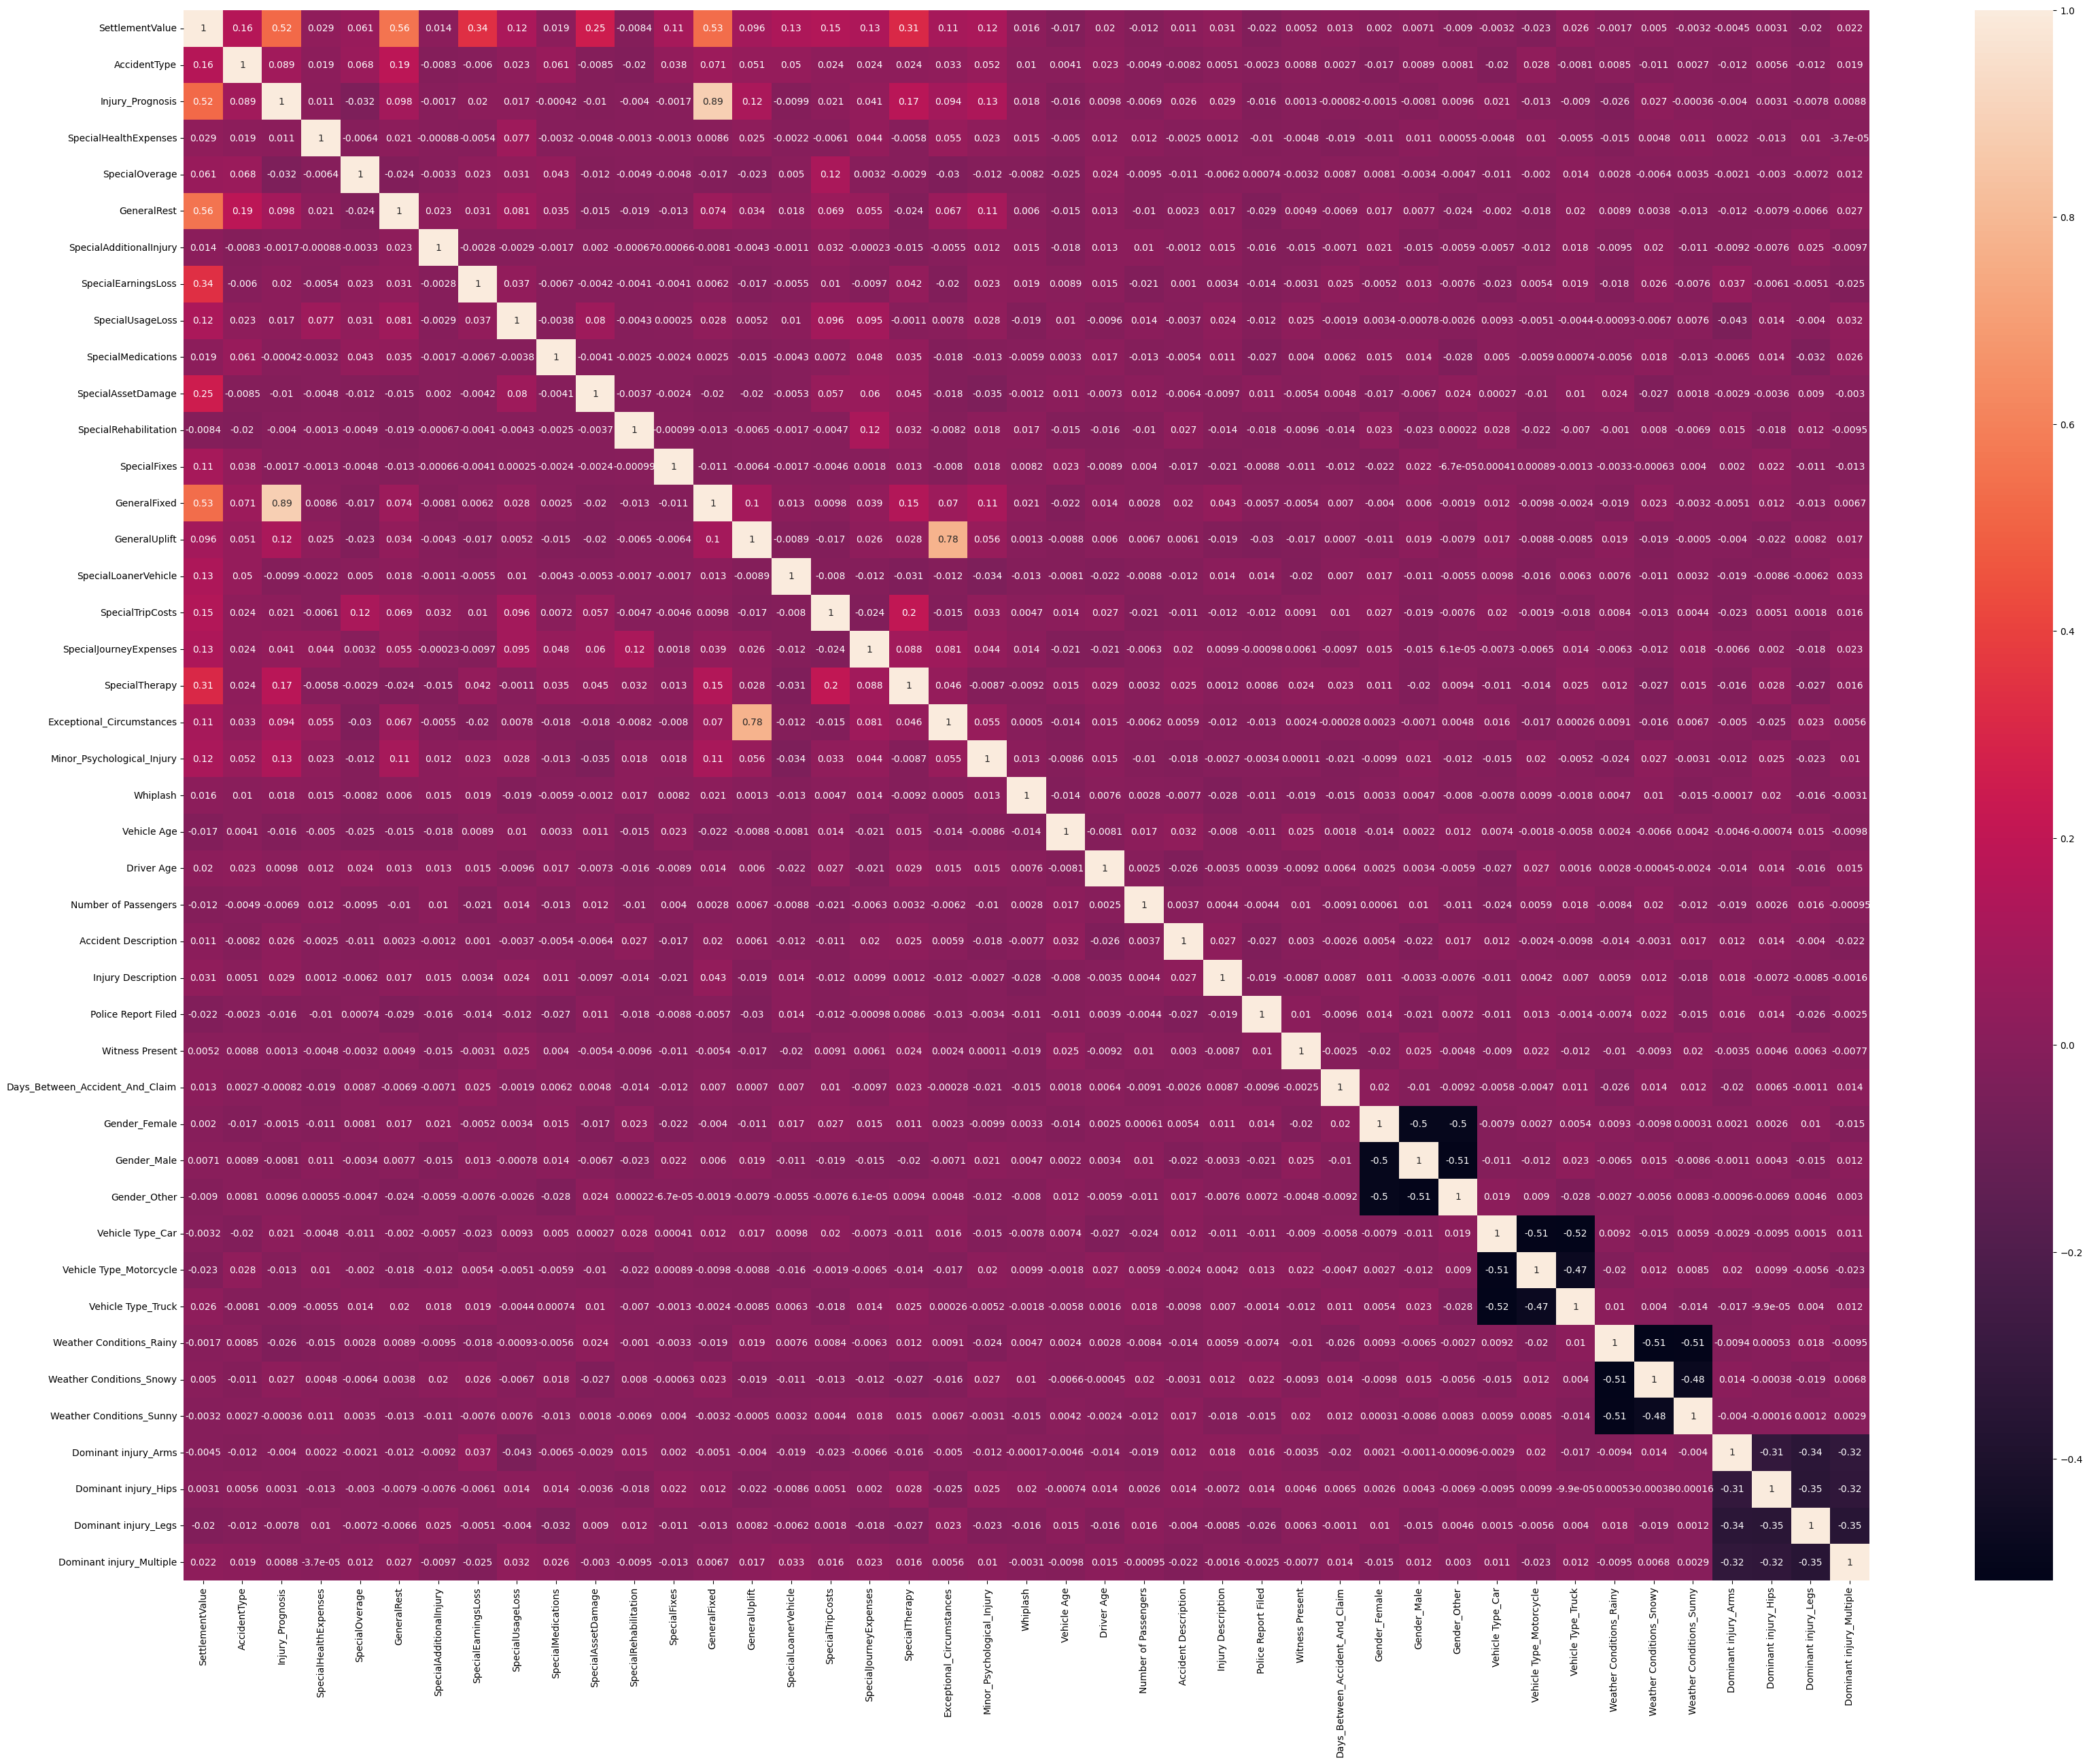

In [48]:
plt.figure(figsize=(40, 30))
sns.heatmap(insurance_data.corr(), annot=True)

### Feature Importance

In [49]:
# create dataframe x and y to store selected features
x = insurance_data.drop(columns=['SettlementValue']) #select all features except target variable
y = insurance_data['SettlementValue'] #target variable

# perform train test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
# train a tree-based algorithm (random forest regressor) to calculate feature importance.
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
# get the feature importance scores from the trained model
feature_importance = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Top 20 Important Features')

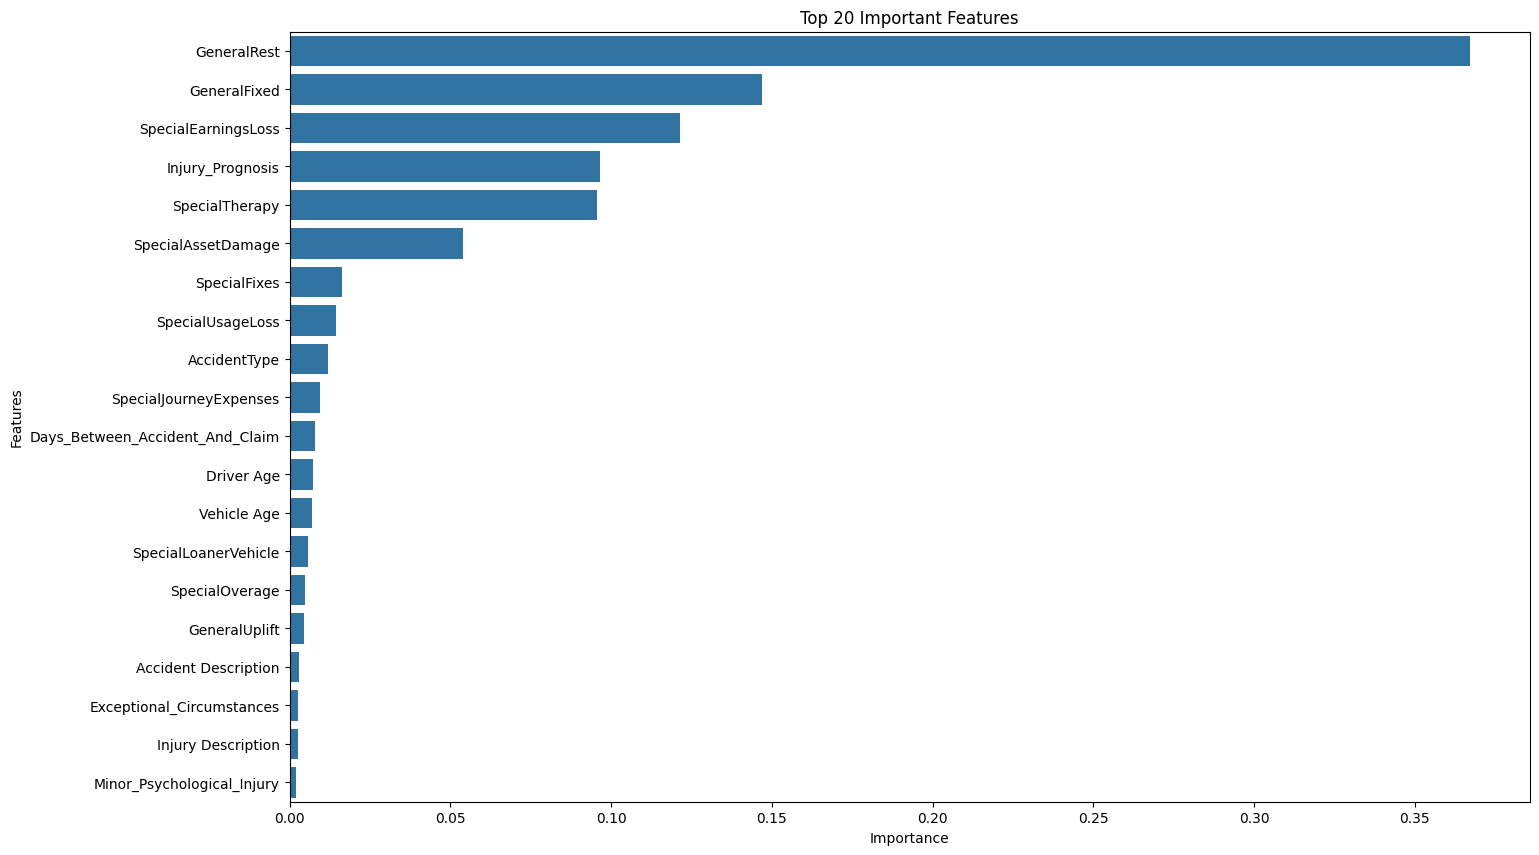

In [52]:
# visualize the importance by plotting the top features
plt.figure(figsize=(16, 10))
sns.barplot(x='Importance', y='Features', data=feature_importance.head(20))
plt.title('Top 20 Important Features')

### Findings on feature importance analysis

Based on the correlation heatmap and feature importance using RandomForestRegressor, we found that the GeneralFixed and GeneralRest are highly correlated with SettlementValue. 
SpecialEarningLoss, SpecialTherapy and SpecialAssetDamage also shows some level of correlation.

# Model Training


Top 3 Models:
                          MAE            MSE        R²
Random Forest      153.991212  151815.585788  0.802837
XGBoost            164.531823  154784.754300  0.798981
Linear Regression  201.576620  156603.175819  0.796619


C:\Users\HRISHI\AppData\Local\Temp\ipykernel_10632\2608005060.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")


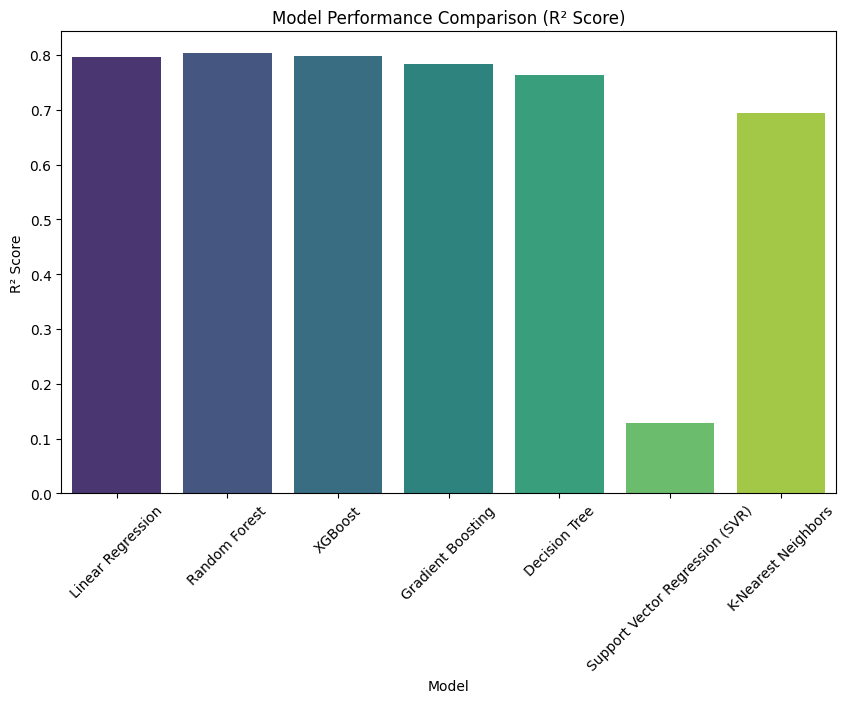

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "C:/Users/HRISHI/OneDrive - Taylor's Education/Desktop/DESD AND AI PROJECT/DESD-AI-2/insurance_claim_data.csv"
insurance_data = pd.read_csv(file_path)


insurance_data.columns = insurance_data.columns.str.strip()

target_column = "SettlementValue"

if target_column not in insurance_data.columns:
    raise ValueError(f"list '{target_column}' No, please check the data set ")

insurance_data["Accident Date"] = pd.to_datetime(insurance_data["Accident Date"], errors='coerce')
insurance_data["Claim Date"] = pd.to_datetime(insurance_data["Claim Date"], errors='coerce')
insurance_data["Days Between Accident & Claim"] = (insurance_data["Claim Date"] - insurance_data["Accident Date"]).dt.days

insurance_data.drop(columns=["Accident Date", "Claim Date"], inplace=True)

numeric_cols = insurance_data.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_column)

X = insurance_data[numeric_cols]
y = insurance_data[target_column]

y.fillna(y.mean(), inplace=True)

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
top_models = results_df.sort_values("R²", ascending=False).head(3)

print("\nTop 3 Models:")
print(top_models)

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


# Model Evaluation